## Grayscale histogram equalization

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("science")
import math
import matplotlib as mpl
from random import shuffle
import pandas as pd
import cv2 as cv
import cvxpy as cp

### Import image

In [2]:
img_cv = cv.imread("../_images/van-gogh-1920x1200.jpg")
img_cv = img_cv.astype(np.float32)
img_cv /= 255.

In [3]:
img_cv = np.array(img_cv)
img_cv.shape

(1200, 1920, 3)

In [4]:
## Image in RGB format
img = np.zeros(img_cv.shape)
img[:, :, 0] = img_cv[:, :, 2]
img[:, :, 1] = img_cv[:, :, 1]
img[:, :, 2] = img_cv[:, :, 0] 

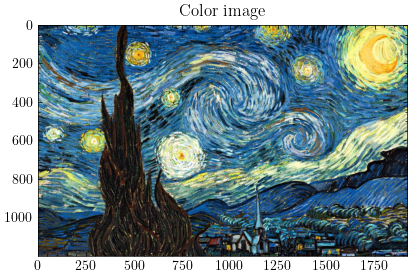

In [5]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.imshow(img, cmap=None)
ax.set_title("Color image")
plt.show()

### Grayscal image

In [6]:
img_grayscale = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.

In [7]:
img_grayscale.shape

(1200, 1920)

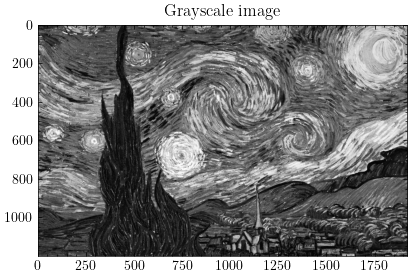

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.imshow(img_grayscale, cmap = "gray")
ax.set_title("Grayscale image")
plt.show()

### Grayscale histogram

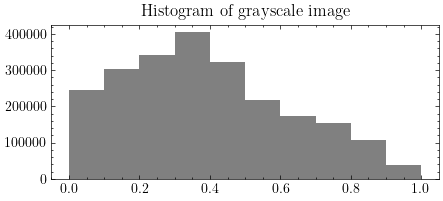

In [9]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.hist(img_grayscale.flatten(), color = "gray")
ax.set_title("Histogram of grayscale image")
plt.show()

### Histogram equalization

In [10]:
hist_equal = np.linspace(0, 1, img_grayscale.size)
img_equal = hist_equal.reshape(img_grayscale.shape)

In [11]:
img_equal = img_grayscale.copy().flatten()
img_equal[np.argsort(img_grayscale.flatten())] = hist_equal
img_equal = img_equal.reshape(img_grayscale.shape)

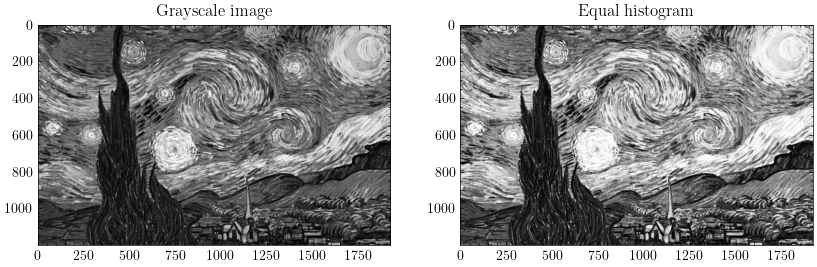

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].imshow(img_grayscale, cmap = "gray")
axes[0].set_title("Grayscale image")
axes[1].imshow(img_equal, cmap = "gray")
axes[1].set_title("Equal histogram")
plt.show()

**Histograms side by side**

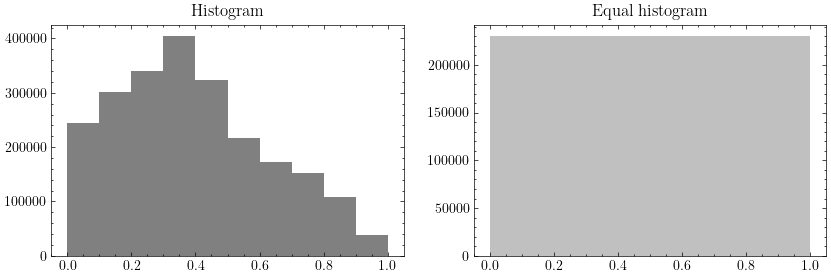

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(img_grayscale.flatten(), color = "gray")
axes[0].set_title("Histogram")
axes[1].hist(img_equal.flatten(), color = "silver")
axes[1].set_title("Equal histogram")
plt.show()